# Cats vs Dogs: The Great Pet Debate 🐱🐶

## 📖 Background

Cats or dogs? For me, it's cats. But what about everyone else? We'll settle the score by analyzing pet data across different regions of the UK.


## 🐈 Data Overview

There are three data files, which contains the data as follows below.

#### The `population_raw_data.csv` data contains these columns:

| Column | Description |
|---------|----------------------------------------|  
| `postal_code` | An identifier for each postal code area|
| `estimated_cat_population` | The estimated cat population for the postal code area |  
| `estimated_dog_population` | The estimated cat population for the postal code area |


#### The `avg_raw_data.csv` data contains these columns:

| Column | Description |
|---------|----------------------------------------|  
| `postcode` | An identifier for each postal code area|
| `cats_per_household` | The average number of cats per household in the postal code area |  
| `dogs_per_household` | The average number of dogs per household in the postal code area |

#### The `postal_raw_data.csv` data contains these columns:

| Column | Description |
|---------|----------------------------------------|  
| `postal_code` | An identifier for each postal code area|
| `town` | The town/towns which are contained in the postal code area |  
| `county` | The UK county that the postal code area is located in |
| `population` | The population of people in each postal code area |
| `num_households` | The number of households in each postal code area |
| `uk_region` | The region in the UK which the postal code is located in |


***Acknowledgments**: 
Data has been assembled and modified from two different sources: [Animal and Plant Health Agency](https://www.data.gov.uk/search?filters%5Bpublisher%5D=Animal+and+Plant+Health+Agency), [Postcodes](
https://ideal-postcodes.co.uk/guides/postcode-areas).


In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [28]:
population_raw_data = pd.read_csv('data/population_per_postal_code.csv')
population_raw_data

,postal_code,estimated_cat_population,estimated_dog_population
0,AB10,"1,675.72","1,921.75"
1,AB11,"2,072.99","2,377.35"
2,AB12,"3,601.57","4,130.35"
3,AB13,"1,153.84","1,323.24"
4,AB14,"2,325.13","2,666.50"
...,...,...,...
2825,YO8,"5,115.47","5,866.53"
2826,ZE1,"1,895.51","2,173.81"
2827,ZE2,"4,586.34","5,259.71"
2828,ZE3,105.0080493,120.4254386


In [29]:
avg_raw_data = pd.read_csv('data/avg_per_household.csv')
avg_raw_data

,postcode,cats_per_household,dogs_per_household
0,AB10,0.164463,0.188610
1,AB11,0.206145,0.236411
2,AB12,0.300306,0.344397
3,AB13,1.145815,1.314045
4,AB14,1.008732,1.156835
...,...,...,...
2825,YO8,0.261034,0.299359
2826,ZE1,0.454124,0.520799
2827,ZE2,0.677350,0.776799
2828,ZE3,0.458550,0.525875


In [30]:
postcodes_raw_data = pd.read_csv('data/postal_codes_areas.csv')
postcodes_raw_data

,postal_code,town,county,population,num_households,uk_region
0,AB1,Aberdeen,Aberdeen,NaN,NaN,Scotland
1,AB2,Aberdeen,Aberdeen,NaN,NaN,Scotland
2,AB3,Aberdeen,Aberdeen,NaN,NaN,Scotland
3,AB4,"Fraserburgh, Peterhead, Macduff",Aberdeen,NaN,NaN,Scotland
4,AB5,"Buckie, Huntly, Inverurie",Aberdeen,NaN,NaN,Scotland
...,...,...,...,...,...,...
3110,YO91,"Lawrence Court, PO Boxes",York,NaN,NaN,Yorkshire and The Humber
3111,YO95,Pocklington,York,NaN,NaN,Yorkshire and The Humber
3112,ZE1,"Lerwick, Scalloway",Shetland,8445.0,3862.0,Scotland
3113,ZE2,Shetland,Shetland,14209.0,5845.0,Scotland


## 🐕 **Executive Summary**

**Purpose:** This analysis aims to examine pet ownership preferences across different regions in the UK, focusing on the ratio of cats to dogs per household and the correlation between pet populations and human populations.

**Problem:** The primary challenges addressed in this analysis include calculating the ratio of cats to dogs per household by region, visualizing the relationship between pet populations and human populations, and determining if there is a regional preference for cats or dogs.

**Data Preprocessing:** The data was merged and cleaned to ensure accurate calculations and visualizations. This included handling missing values and ensuring consistent data types across columns.

**Analysis:**

Cats to Dogs Ratio by Region:

- The ratio of cats per household to dogs per household was calculated and grouped by UK regions.
- The analysis revealed that the cat to dog ratio is fairly similar across different regions, indicating no significant regional preference for either pet.

Correlation Between Pet Populations and Human Populations:

- Scatterplots were created to visualize the relationship between estimated cat and dog populations versus the human population.
- The R-squared values for both cat and dog populations were calculated, indicating a weak positive correlation with human populations.
- Specifically, the R-squared value was found to be 0.24, suggesting that while there is some correlation, it is not strong.

**Conclusion:** The analysis suggests that pet ownership preferences do not significantly vary by geographic region within the UK. Overall, it appears that all regions in the UK prefer dogs over cats, settling the debate on regional pet ownership preferences. This comprehensive analysis provides valuable insights into pet ownership trends and their relationship with human populations, contributing to a better understanding of pet demographics in the UK.

## 🐈 Data Preprocessing


### Data Profiling
Before we do any analysis, let's take a look at the data to see what we are working with.

What does a sample of the datasets look like?

In [31]:
# Head of population_raw_data
display(population_raw_data.head())

# Head of avg_raw_data
display(avg_raw_data.head())

# Head of postcodes_raw_data
display(postcodes_raw_data.head())

,postal_code,estimated_cat_population,estimated_dog_population
0,AB10,"1,675.72","1,921.75"
1,AB11,"2,072.99","2,377.35"
2,AB12,"3,601.57","4,130.35"
3,AB13,"1,153.84","1,323.24"
4,AB14,"2,325.13","2,666.50"


,postcode,cats_per_household,dogs_per_household
0,AB10,0.164463,0.188610
1,AB11,0.206145,0.236411
2,AB12,0.300306,0.344397
3,AB13,1.145815,1.314045
4,AB14,1.008732,1.156835


,postal_code,town,county,population,num_households,uk_region
0,AB1,Aberdeen,Aberdeen,NaN,NaN,Scotland
1,AB2,Aberdeen,Aberdeen,NaN,NaN,Scotland
2,AB3,Aberdeen,Aberdeen,NaN,NaN,Scotland
3,AB4,"Fraserburgh, Peterhead, Macduff",Aberdeen,NaN,NaN,Scotland
4,AB5,"Buckie, Huntly, Inverurie",Aberdeen,NaN,NaN,Scotland


What are the column names and data types? How many non-null values does each column have?

In [32]:
# Information for population_raw_data
print("Information for population_raw_data:")
population_raw_data.info()

# Information for avg_raw_data
print("\nInformation for avg_raw_data:")
avg_raw_data.info()

# Information for postcodes_raw_data
print("\nInformation for postcodes_raw_data:")
postcodes_raw_data.info()

Information for population_raw_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830 entries, 0 to 2829
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   postal_code               2830 non-null   object
 1   estimated_cat_population  2830 non-null   object
 2   estimated_dog_population  2830 non-null   object
dtypes: object(3)
memory usage: 66.5+ KB

Information for avg_raw_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830 entries, 0 to 2829
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   postcode            2830 non-null   object 
 1   cats_per_household  2830 non-null   float64
 2   dogs_per_household  2830 non-null   float64
dtypes: float64(2), object(1)
memory usage: 66.5+ KB

Information for postcodes_raw_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3115 entries, 0 to 3114


How many missing values does each column have?


In [33]:
# Missing values in population_raw_data
print("Missing values in population_raw_data:")
display(population_raw_data.isnull().sum())

# Missing values in avg_raw_data
print("\nMissing values in avg_raw_data:")
display(avg_raw_data.isnull().sum())

# Missing values in postcodes_raw_data
print("\nMissing values in postcodes_raw_data:")
display(postcodes_raw_data.isnull().sum())

Missing values in population_raw_data:


postal_code                 0
estimated_cat_population    0
estimated_dog_population    0
dtype: int64


Missing values in avg_raw_data:


postcode              0
cats_per_household    0
dogs_per_household    0
dtype: int64


Missing values in postcodes_raw_data:


postal_code         0
town                0
county              1
population        301
num_households    301
uk_region          36
dtype: int64

How many unique values does each column have?


In [34]:
# Unique values in population_raw_data
print("Unique values in population_raw_data:")
display(population_raw_data.nunique())

# Unique values in avg_raw_data
print("\nUnique values in avg_raw_data:")
display(avg_raw_data.nunique())

# Unique values in postcodes_raw_data
print("\nUnique values in postcodes_raw_data:")
display(postcodes_raw_data.nunique())

Unique values in population_raw_data:


postal_code                 2830
estimated_cat_population    2731
estimated_dog_population    2734
dtype: int64


Unique values in avg_raw_data:


postcode              2830
cats_per_household    2731
dogs_per_household    2731
dtype: int64


Unique values in postcodes_raw_data:


postal_code       3115
town              2798
county             427
population        2726
num_households    2617
uk_region           12
dtype: int64

How many duplicate values does each column have?

In [35]:
# Duplicated rows in population_raw_data
population_duplicates = population_raw_data.duplicated().sum()
print(f"Duplicated rows in population_raw_data: {population_duplicates}")

# Duplicated rows in avg_raw_data
avg_duplicates = avg_raw_data.duplicated().sum()
print(f"\nDuplicated rows in avg_raw_data: {avg_duplicates}")

# Duplicated rows in postcodes_raw_data
postcodes_duplicates = postcodes_raw_data.duplicated().sum()
print(f"\nDuplicated rows in postcodes_raw_data: {postcodes_duplicates}")

Duplicated rows in population_raw_data: 0

Duplicated rows in avg_raw_data: 0

Duplicated rows in postcodes_raw_data: 0


Some insights:
- population_raw_data categorized all three columns as objects
- avg_raw_data categorized the postal_codes as objects and cats_per_household and dogs_per_household columns as floats
- postcodes_raw_data categorized postal_code, town, county, and uk-region as objects and population and num_households as floats
- population_raw_data and avg_raw_data both don't have any null values
- postcodes_raw_data is the only dataset that has missing values. It has 301 missing entries in the population and num-households column, 1 missing value in the county column, and 36 in the uk-region column
- Both population_raw_data and avg_raw_data have 2830 unique post codes while postcodes_raw_data has 3115 unique post codes
- There are no duplicates in any of the datasets

### Data Cleaning
There's some cleanup needed before we do the analysis. 

In the estimated cat and dog population columns, there's a comma in the data and it's shown as object rather than float. Let's update those two columns and combine the three tables into one for easier analysis. There are also some null data but only a few so let's drop them.

In [36]:
# Taking out the comma and changing the data type
population_raw_data['estimated_cat_population'] = population_raw_data['estimated_cat_population'].astype(str).str.replace(',', '').astype(float)
population_raw_data['estimated_dog_population'] = population_raw_data['estimated_dog_population'].astype(str).str.replace(',', '').astype(float)

In [37]:
# Verifying the comma is gone
population_raw_data.head()

,postal_code,estimated_cat_population,estimated_dog_population
0,AB10,1675.72,1921.75
1,AB11,2072.99,2377.35
2,AB12,3601.57,4130.35
3,AB13,1153.84,1323.24
4,AB14,2325.13,2666.50


In [38]:
# Verifying that the data type has been updated
population_raw_data.dtypes

postal_code                  object
estimated_cat_population    float64
estimated_dog_population    float64
dtype: object

When joining all three tables together, I am utilizing the left join to only leave post code information that is relevant in the other two tables. Since we are concerned about the how the regional data correlates with the pet information, it would not be necessary to preserve the extra post code data.

In [39]:
-- Join all three tables together
SELECT pp.postal_code, pp.estimated_cat_population, pp.estimated_dog_population, a.cats_per_household, a.dogs_per_household, p.town, p.county, p.population, p.num_households, p.uk_region
FROM population_raw_data AS pp
INNER JOIN avg_raw_data AS a ON pp.postal_code = a.postcode
LEFT JOIN postcodes_raw_data AS p ON pp.postal_code = p.postal_code

,postal_code,estimated_cat_population,estimated_dog_population,cats_per_household,dogs_per_household,town,county,population,num_households,uk_region
0,AB10,1675.720000,1921.75000,0.164463,0.188610,"Aberdeen city centre, Bridge of Dee, Mannofield",Aberdeen,21964.0,11517.0,Scotland
1,AB11,2072.990000,2377.35000,0.206145,0.236411,"Aberdeen city centre, Torry",Aberdeen,21237.0,10926.0,Scotland
2,AB12,3601.570000,4130.35000,0.300306,0.344397,"Aberdeen, Altens, Ardoe, Banchory Devenick, Bl...",Aberdeen,25414.0,10688.0,Scotland
3,AB13,1153.840000,1323.24000,1.145815,1.314045,Milltimber,Aberdeen,2725.0,947.0,Scotland
4,AB14,2325.130000,2666.50000,1.008732,1.156835,"Peterculter, Upper Anguston",Aberdeen,4881.0,2162.0,Scotland
...,...,...,...,...,...,...,...,...,...,...
2825,TS23,5149.330000,5905.36000,0.396927,0.455204,Billingham (East),Stockton-on-Tees,30242.0,12465.0,North East
2826,TS24,1675.620000,1921.63000,0.152773,0.175203,Hartlepool,Hartlepool,22255.0,10163.0,North East
2827,UB8,2277.230000,2611.58000,0.164635,0.188807,"Uxbridge, Cowley, Hillingdon",Hillingdon,36152.0,12704.0,London
2828,WC2B,31.888664,36.57059,0.031202,0.035783,"Drury Lane, Aldwych",Camden,1831.0,953.0,London


In [40]:
# Check the new dataframe
JOINED.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830 entries, 0 to 2829
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   postal_code               2830 non-null   object 
 1   estimated_cat_population  2830 non-null   float64
 2   estimated_dog_population  2830 non-null   float64
 3   cats_per_household        2830 non-null   float64
 4   dogs_per_household        2830 non-null   float64
 5   town                      2830 non-null   object 
 6   county                    2830 non-null   object 
 7   population                2734 non-null   float64
 8   num_households            2734 non-null   float64
 9   uk_region                 2830 non-null   object 
dtypes: float64(6), object(4)
memory usage: 221.2+ KB


There are 2 columns with null data so let's drop the rows with null data. 

In [41]:
# Drop the null data
JOINED.dropna(inplace=True)

In [42]:
# Check to make sure there are no null data
JOINED.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2734 entries, 0 to 2829
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   postal_code               2734 non-null   object 
 1   estimated_cat_population  2734 non-null   float64
 2   estimated_dog_population  2734 non-null   float64
 3   cats_per_household        2734 non-null   float64
 4   dogs_per_household        2734 non-null   float64
 5   town                      2734 non-null   object 
 6   county                    2734 non-null   object 
 7   population                2734 non-null   float64
 8   num_households            2734 non-null   float64
 9   uk_region                 2734 non-null   object 
dtypes: float64(6), object(4)
memory usage: 235.0+ KB


In [43]:
# Check to make sure there are no null data
JOINED.isnull().sum()

postal_code                 0
estimated_cat_population    0
estimated_dog_population    0
cats_per_household          0
dogs_per_household          0
town                        0
county                      0
population                  0
num_households              0
uk_region                   0
dtype: int64

### Exploratory Analysis
With the data cleaned up, we can now do some exploratory analysis to gain some initial insights into the data. 

We will take a look at the summary statistcs, histograms for the distributions of the pet populations, and boxplots to check for outliers. 

In [44]:
# Summary statistics for the numerical data
JOINED.describe()

,estimated_cat_population,estimated_dog_population,cats_per_household,dogs_per_household,population,num_households
count,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000
mean,3699.546631,4242.717844,0.466887,0.535436,22445.430871,9413.558888
std,3158.618034,3622.369630,0.399269,0.457890,16649.370756,6850.879208
min,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1359.660000,1559.282500,0.208497,0.239109,9195.750000,3992.750000
50%,2901.145000,3327.100000,0.354497,0.406545,20422.000000,8654.500000
75%,5190.400000,5952.462500,0.603211,0.691775,32520.250000,13602.500000
max,23544.450000,27001.270000,5.212126,5.977375,153812.000000,61886.000000


In general,  the dog data is higher than the cat data. For example, the mean estimated dog population is 4242.72 which is higher than the mean estimated cat population at 3699.55. The mean dogs per household is 0.54 and the mean cats per household is 0.47. The max estimated dog population is 27001.27 while the max estimated cat population is 23544.45. The mean human population is 22445.43 with an average of 9413.56 number of hourseholds.

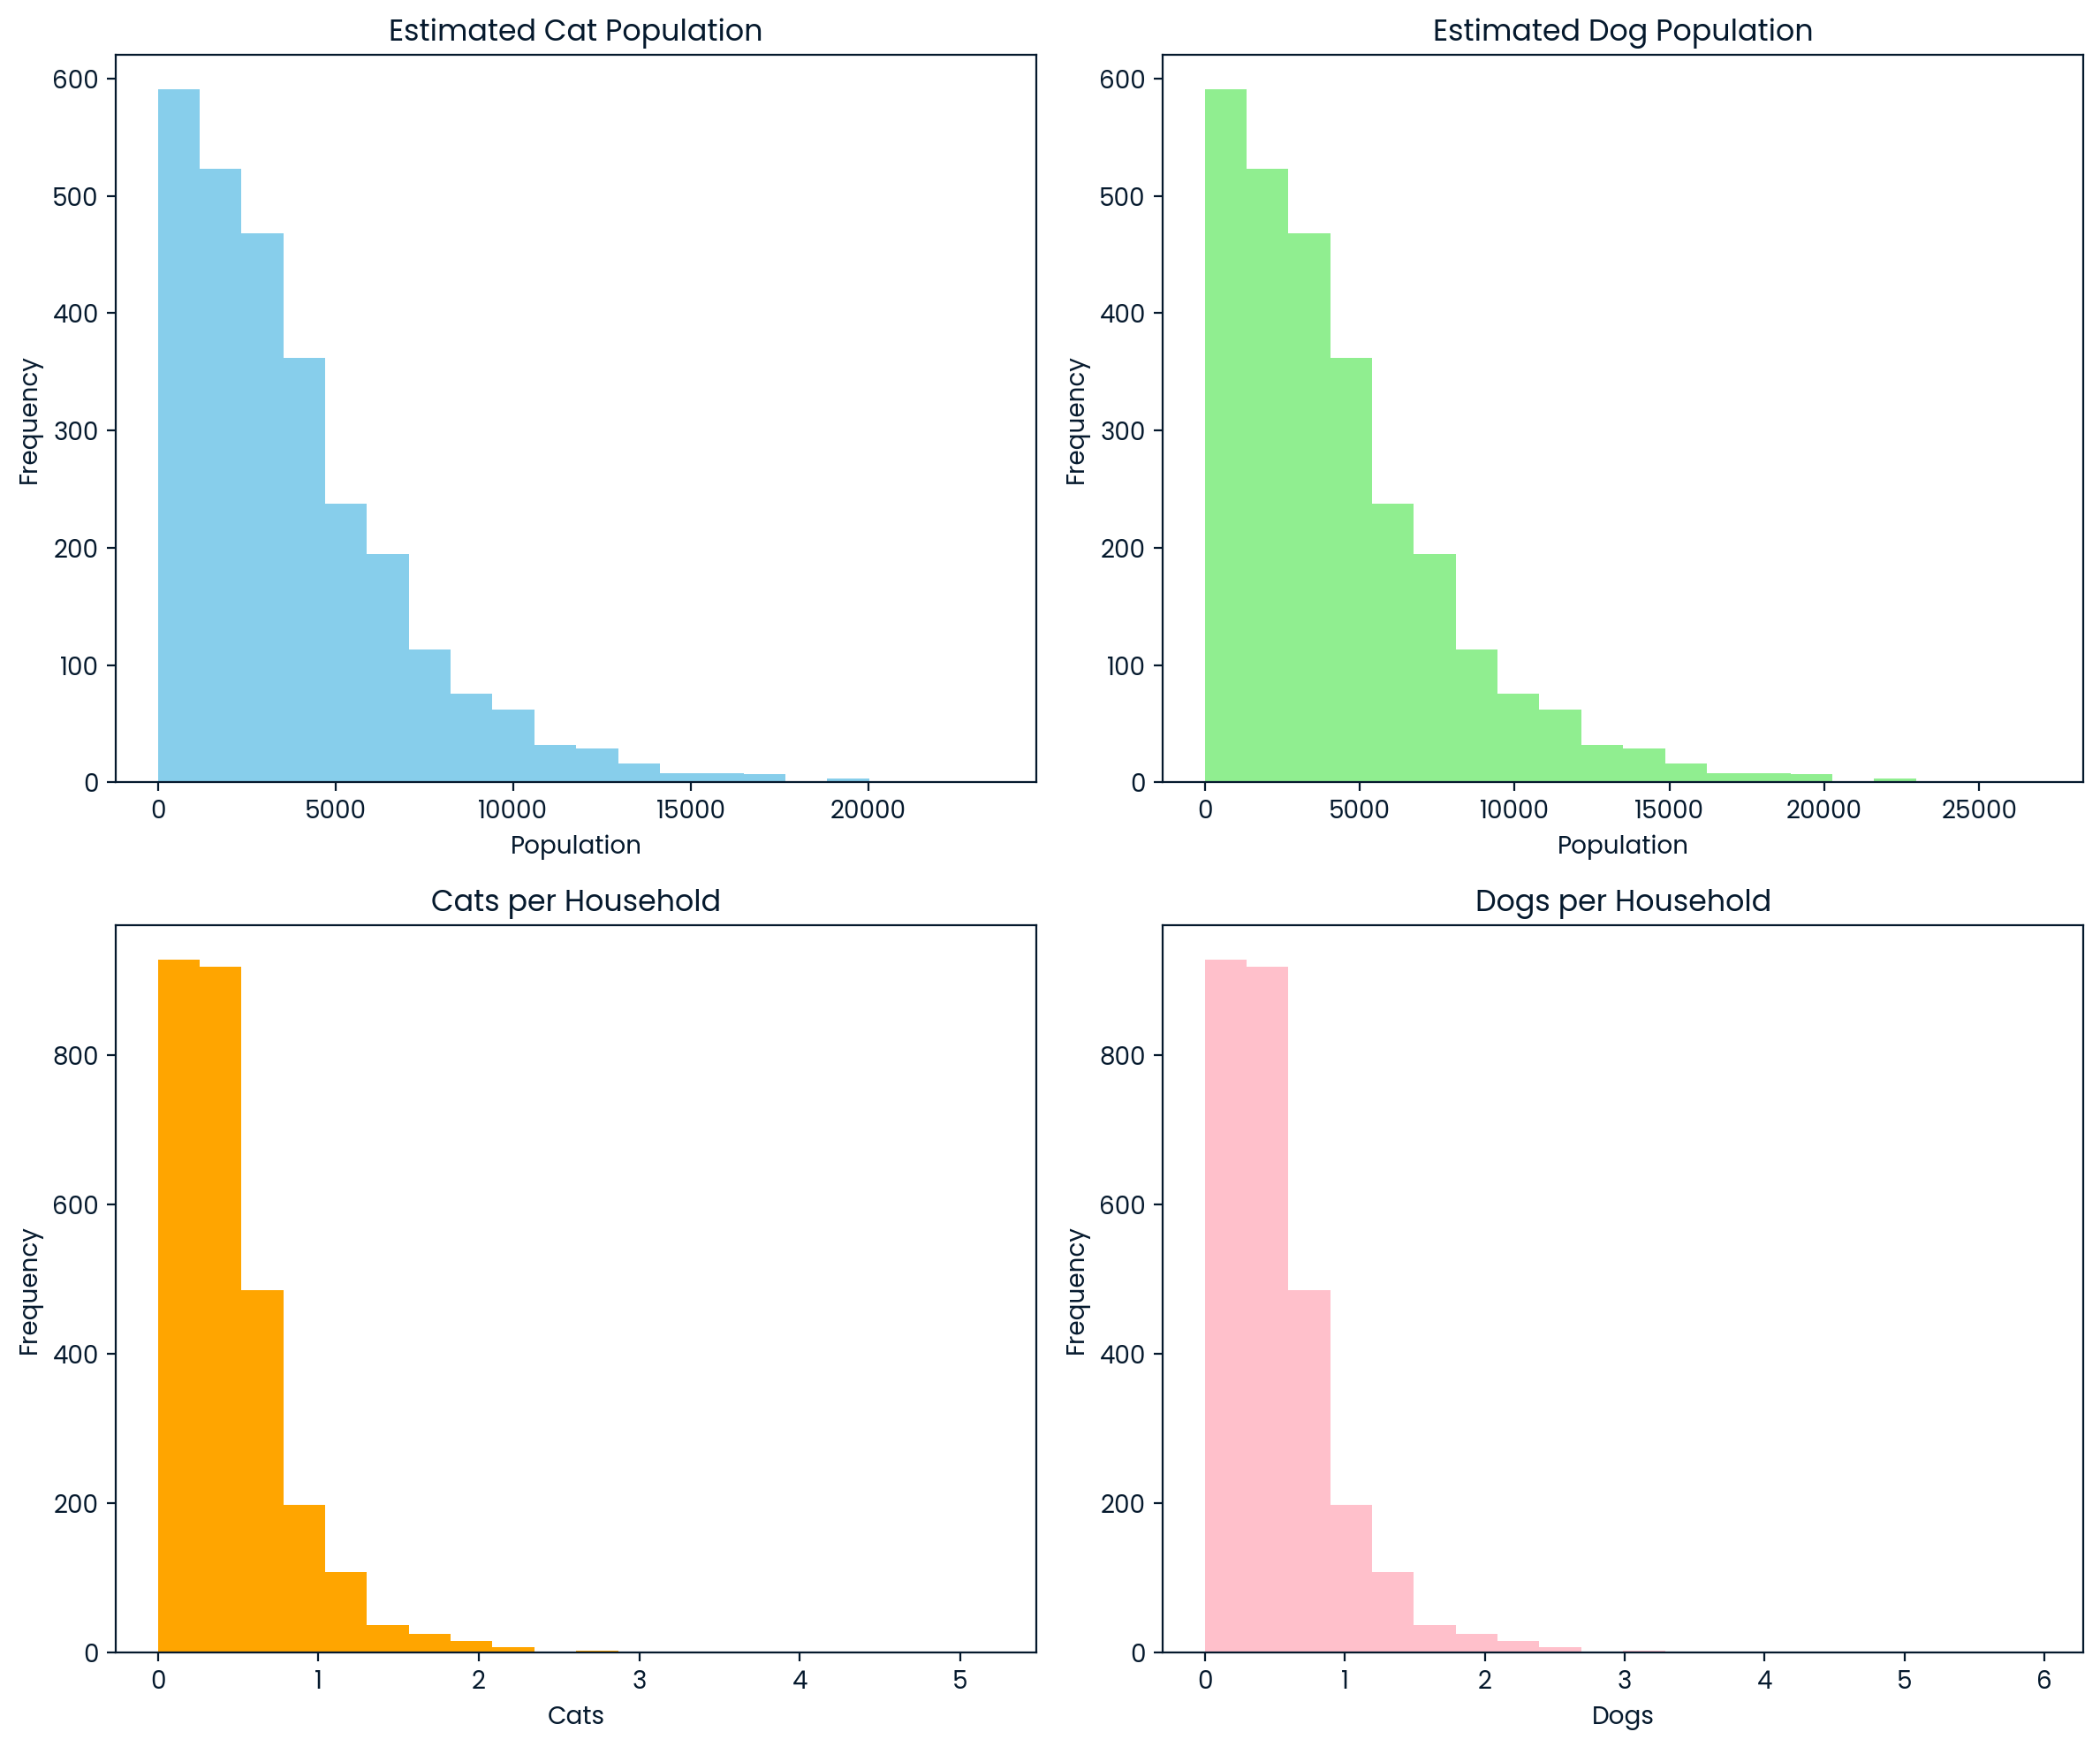

In [45]:
# Creating histograms for the specified columns
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for estimated_cat_population
axs[0, 0].hist(JOINED['estimated_cat_population'], bins=20, color='skyblue')
axs[0, 0].set_title('Estimated Cat Population')
axs[0, 0].set_xlabel('Population')
axs[0, 0].set_ylabel('Frequency')

# Histogram for estimated_dog_population
axs[0, 1].hist(JOINED['estimated_dog_population'], bins=20, color='lightgreen')
axs[0, 1].set_title('Estimated Dog Population')
axs[0, 1].set_xlabel('Population')
axs[0, 1].set_ylabel('Frequency')

# Histogram for cats_per_household
axs[1, 0].hist(JOINED['cats_per_household'], bins=20, color='orange')
axs[1, 0].set_title('Cats per Household')
axs[1, 0].set_xlabel('Cats')
axs[1, 0].set_ylabel('Frequency')

# Histogram for dogs_per_household
axs[1, 1].hist(JOINED['dogs_per_household'], bins=20, color='pink')
axs[1, 1].set_title('Dogs per Household')
axs[1, 1].set_xlabel('Dogs')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

We can see that all four histograms are right skewed and that makes sense since most people will no pets or just one or two. The estimated cat and dog populations all tend be close to zero, with only a few crossing the 15000 mark. Those on the right will likely be regions that have higher human populations which then leads to higher pet populations. Most people will have between 0 an 1 pets per household. 

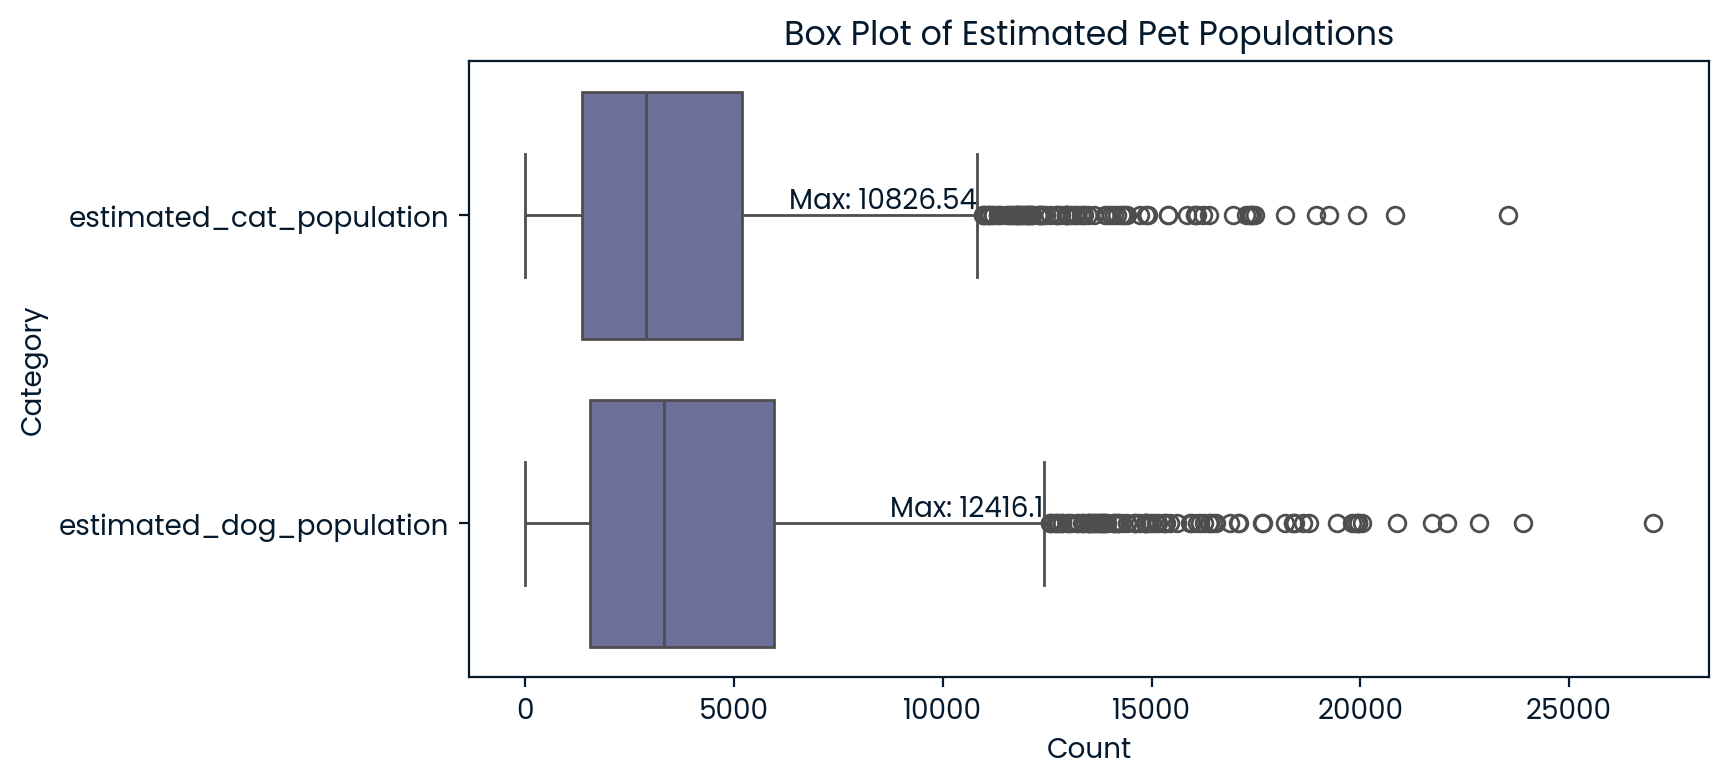

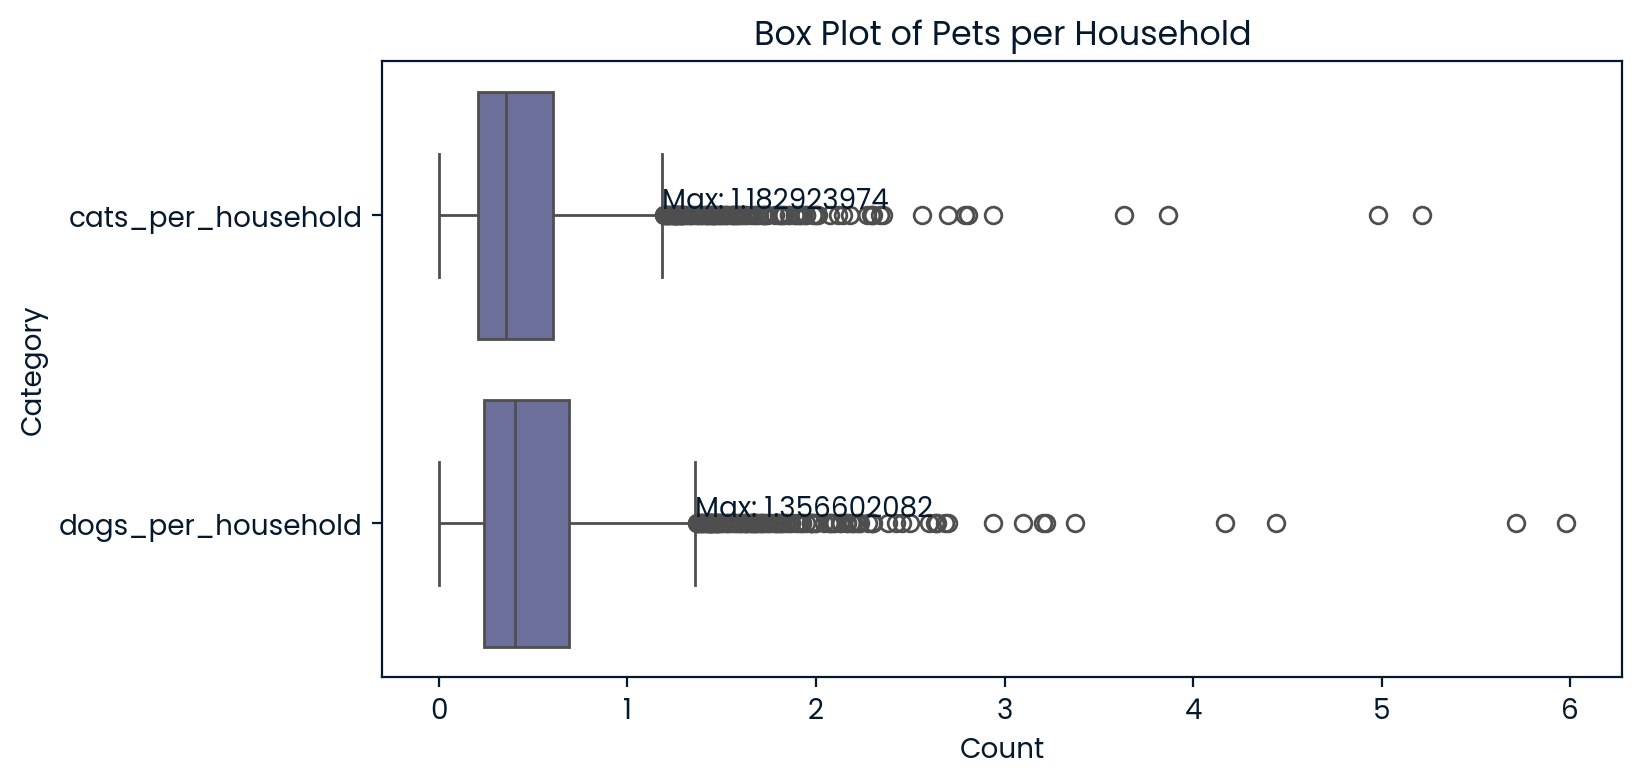

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melting the DataFrames to have a suitable format for sns.boxplot
boxplot_data_pets_population_melted = JOINED[['estimated_cat_population', 'estimated_dog_population']].melt(var_name='Category', value_name='Value')
boxplot_data_pets_per_household_melted = JOINED[['cats_per_household', 'dogs_per_household']].melt(var_name='Category', value_name='Value')

# Creating the boxplot for pet populations
plt.figure(figsize=(8, 4))
sns.boxplot(x='Value', y='Category', data=boxplot_data_pets_population_melted)
plt.title('Box Plot of Estimated Pet Populations')
plt.xlabel('Count')
plt.ylabel('Category')

# Displaying the max number without the outlier for pet populations
for category in boxplot_data_pets_population_melted['Category'].unique():
    # Calculating Q1 and Q3
    q1_value = boxplot_data_pets_population_melted[boxplot_data_pets_population_melted['Category'] == category]['Value'].quantile(0.25)
    q3_value = boxplot_data_pets_population_melted[boxplot_data_pets_population_melted['Category'] == category]['Value'].quantile(0.75)
    # Calculating IQR
    iqr = q3_value - q1_value
    # Calculating the upper bound to identify outliers
    upper_bound = q3_value + (1.5 * iqr)
    # Filtering out the outliers and finding the max value
    max_value_without_outlier = boxplot_data_pets_population_melted[(boxplot_data_pets_population_melted['Category'] == category) & (boxplot_data_pets_population_melted['Value'] <= upper_bound)]['Value'].max()
    plt.text(max_value_without_outlier, category, f'Max: {max_value_without_outlier}', verticalalignment='bottom', horizontalalignment='right')

plt.show()

# Creating the boxplot for pets per household
plt.figure(figsize=(8, 4))
sns.boxplot(x='Value', y='Category', data=boxplot_data_pets_per_household_melted)
plt.title('Box Plot of Pets per Household')
plt.xlabel('Count')
plt.ylabel('Category')

# Displaying the max number for pets per household
for category in boxplot_data_pets_per_household_melted['Category'].unique():
    # Calculating Q1 and Q3
    q1_value = boxplot_data_pets_per_household_melted[boxplot_data_pets_per_household_melted['Category'] == category]['Value'].quantile(0.25)
    q3_value = boxplot_data_pets_per_household_melted[boxplot_data_pets_per_household_melted['Category'] == category]['Value'].quantile(0.75)
    # Calculating IQR
    iqr = q3_value - q1_value
    # Calculating the upper bound to identify outliers
    upper_bound = q3_value + (1.5 * iqr)
    # Filtering out the outliers and finding the max value
    max_value_without_outlier = boxplot_data_pets_per_household_melted[(boxplot_data_pets_per_household_melted['Category'] == category) & (boxplot_data_pets_per_household_melted['Value'] <= upper_bound)]['Value'].max()
    plt.text(max_value_without_outlier, category, f'Max: {max_value_without_outlier}', verticalalignment='bottom', horizontalalignment='left')

plt.show()

There are many outliers in the data.  For the estimated populations, dogs have a greater range at 12416.1 over cats at 10826.54. There are fewer outliers the further out we go with only one estimated populatin over 25000 in the dog data. The pets per household also indicates greater range in dogs at 1.36 over cats at 1.18.

## 🐕 Analysis
It is time to analyze the data! We'll be focusing the analysis to answer the following questions: 
- Examine if pet preferences correlate to estimated pet populations, or geographic regions. Create visualizations to present your findings.
- Develop an accessible summary of study findings on factors linked to cat and dog ownership rates for non-technical audiences.
- See if you can identify any regional trends; which areas prefer cats vs. dogs?

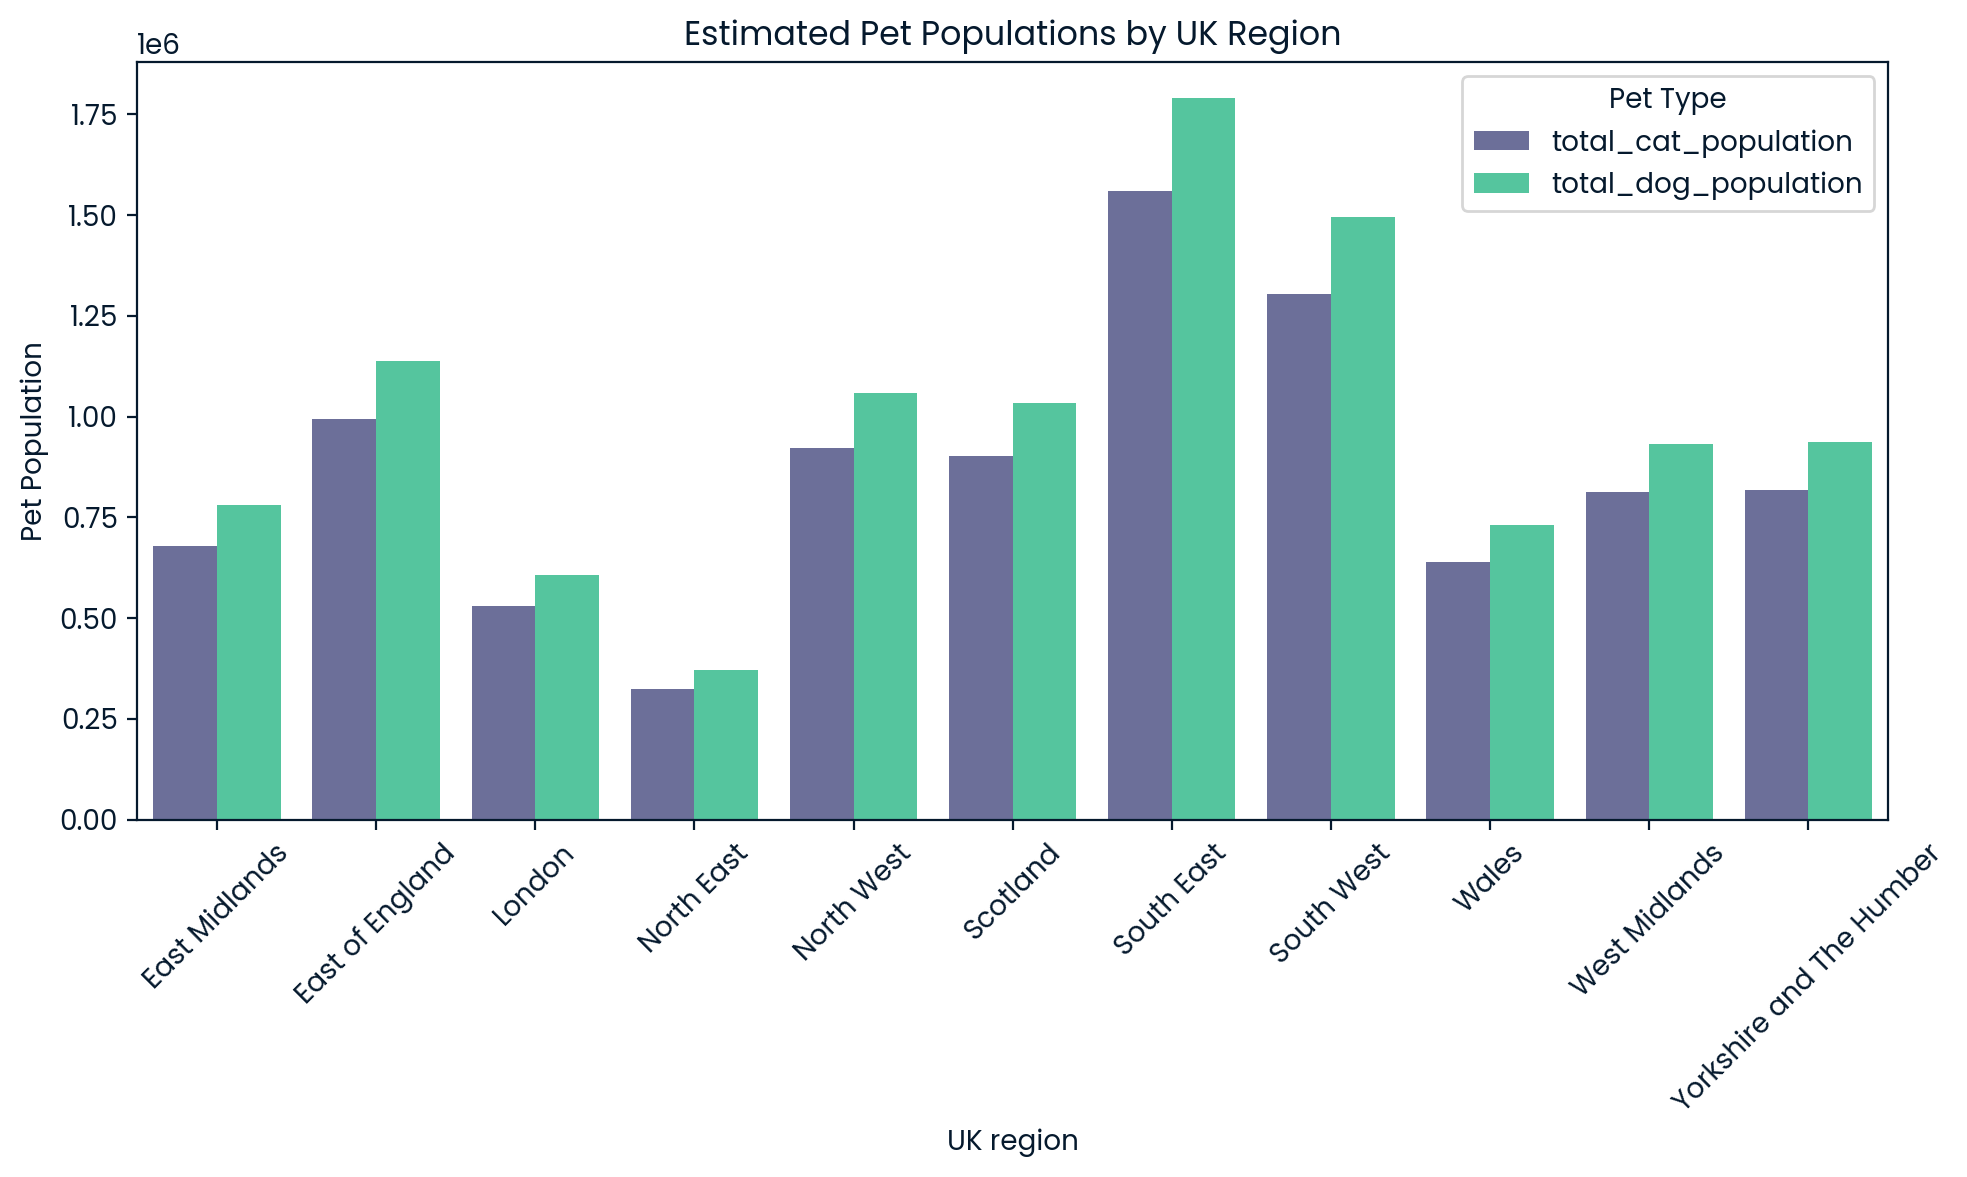

In [47]:
# Merging the average pets per household data with geographic information
merged_data = avg_raw_data.merge(postcodes_raw_data, left_on='postcode', right_on='postal_code')

# Calculating the total estimated pet population by region
merged_data['total_cat_population'] = merged_data['cats_per_household'] * merged_data['num_households']
merged_data['total_dog_population'] = merged_data['dogs_per_household'] * merged_data['num_households']
region_pet_population = merged_data.groupby('uk_region')[['total_cat_population', 'total_dog_population']].sum().reset_index()

# Plotting the estimated pet populations by region
region_pet_population_melted = region_pet_population.melt(id_vars='uk_region', var_name='Pet Type', value_name='Population')
plt.figure(figsize=(10, 6))
sns.barplot(x='uk_region', y='Population', hue='Pet Type', data=region_pet_population_melted)
plt.title('Estimated Pet Populations by UK Region')
plt.xlabel('UK region')
plt.ylabel('Pet Population')
plt.xticks(rotation=45)
plt.legend(title='Pet Type')
plt.tight_layout()
plt.show()


The North East region has the lowest estimated pet population while the South East region has the highest. In every region, the estimated dog population is higher than the estimated cat population. 

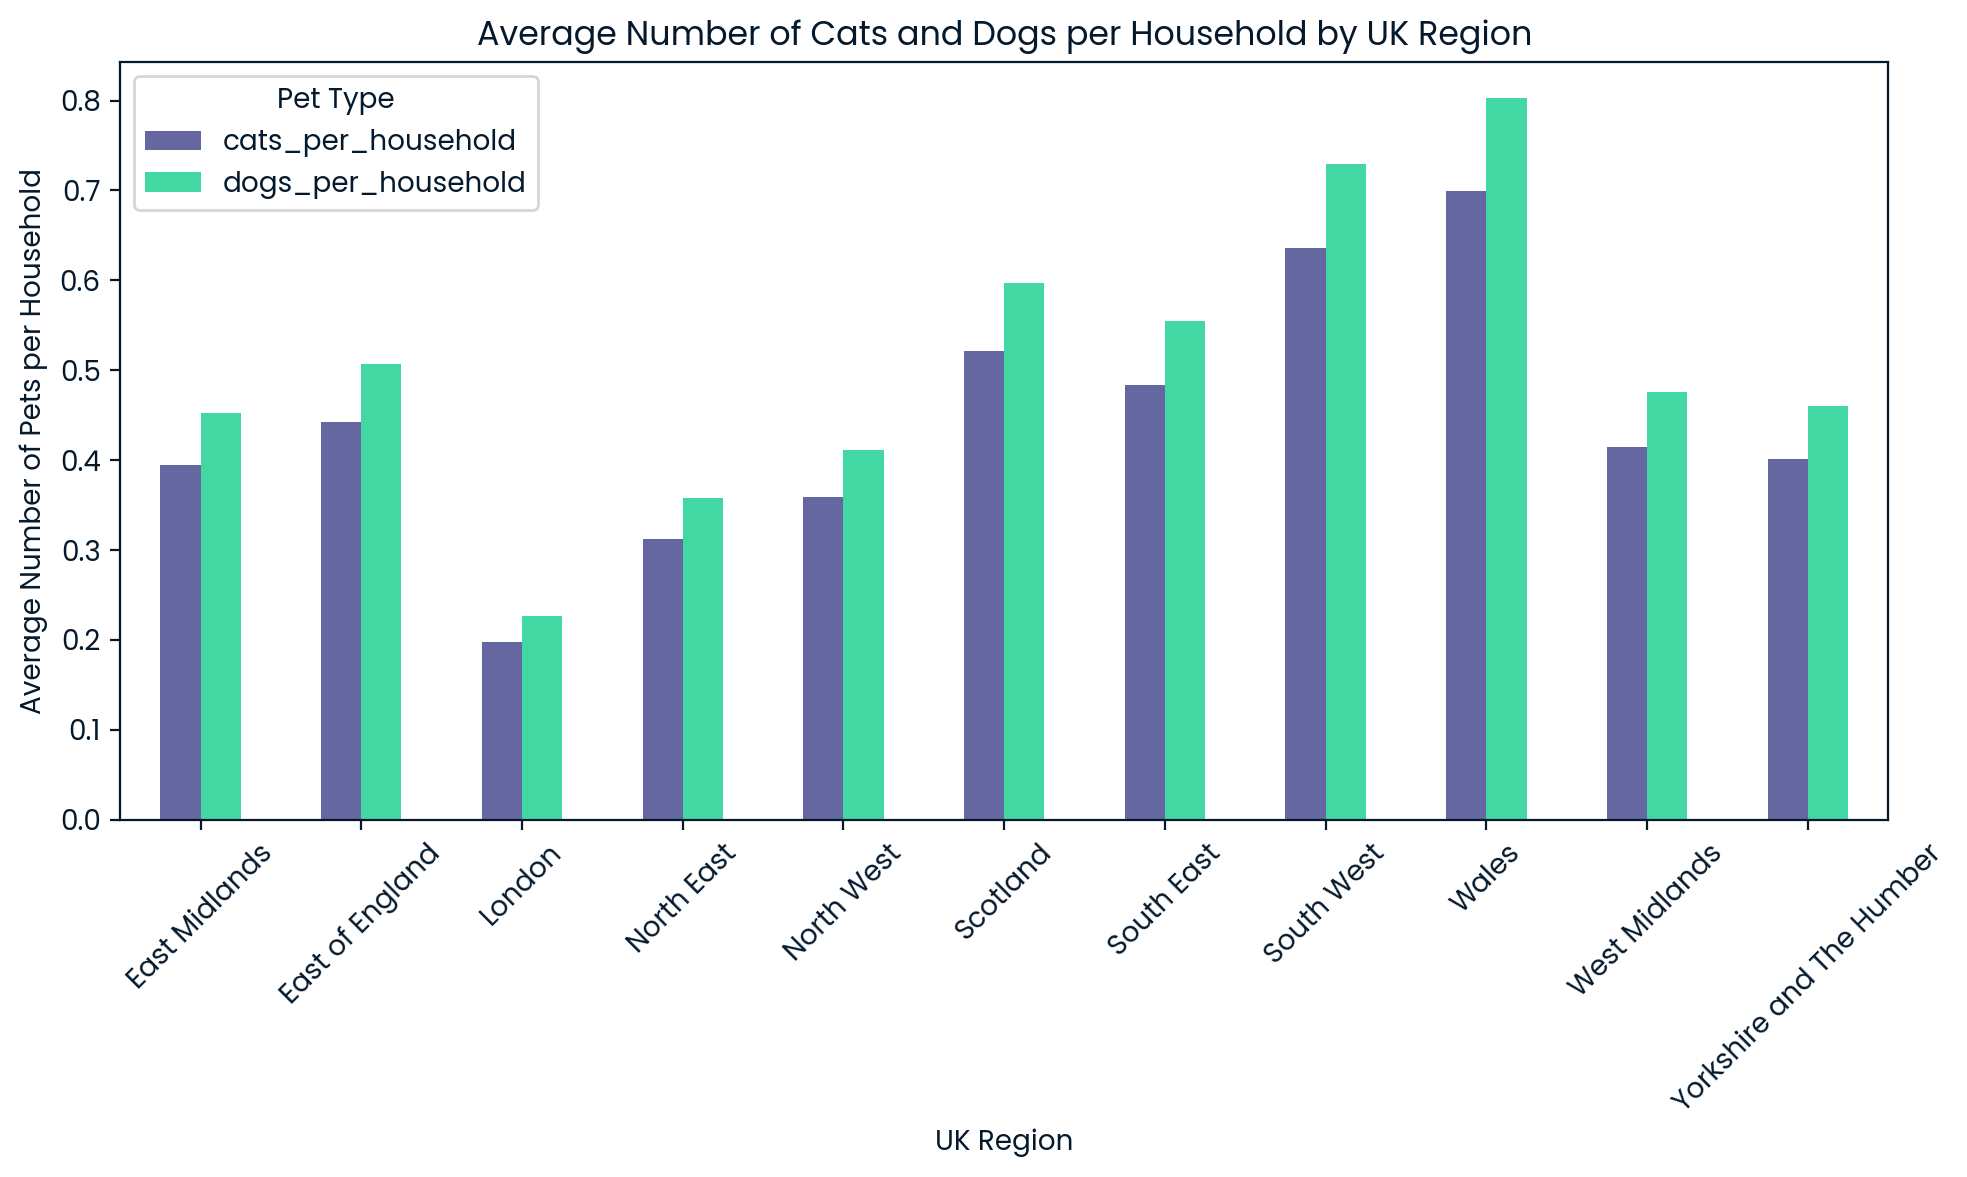

In [48]:
# Merging the average pets per household data with the region information
pets_per_household_by_region = avg_raw_data.merge(postcodes_raw_data[['postal_code', 'uk_region']], left_on='postcode', right_on='postal_code', how='left')

# Grouping by region and calculating the mean for cats and dogs per household
pets_per_household_avg_by_region = pets_per_household_by_region.groupby('uk_region').mean()[['cats_per_household', 'dogs_per_household']]

# Plotting
pets_per_household_avg_by_region.plot(kind='bar', figsize=(10, 6))
plt.title('Average Number of Cats and Dogs per Household by UK Region')
plt.ylabel('Average Number of Pets per Household')
plt.xlabel('UK Region')
plt.xticks(rotation=45)
plt.legend(title='Pet Type')
plt.tight_layout()
plt.show()

In the average number of pets per household, London had the least while Wales had the most at more than triple the number for London. Again, more dogs per household than cats per household for every region.

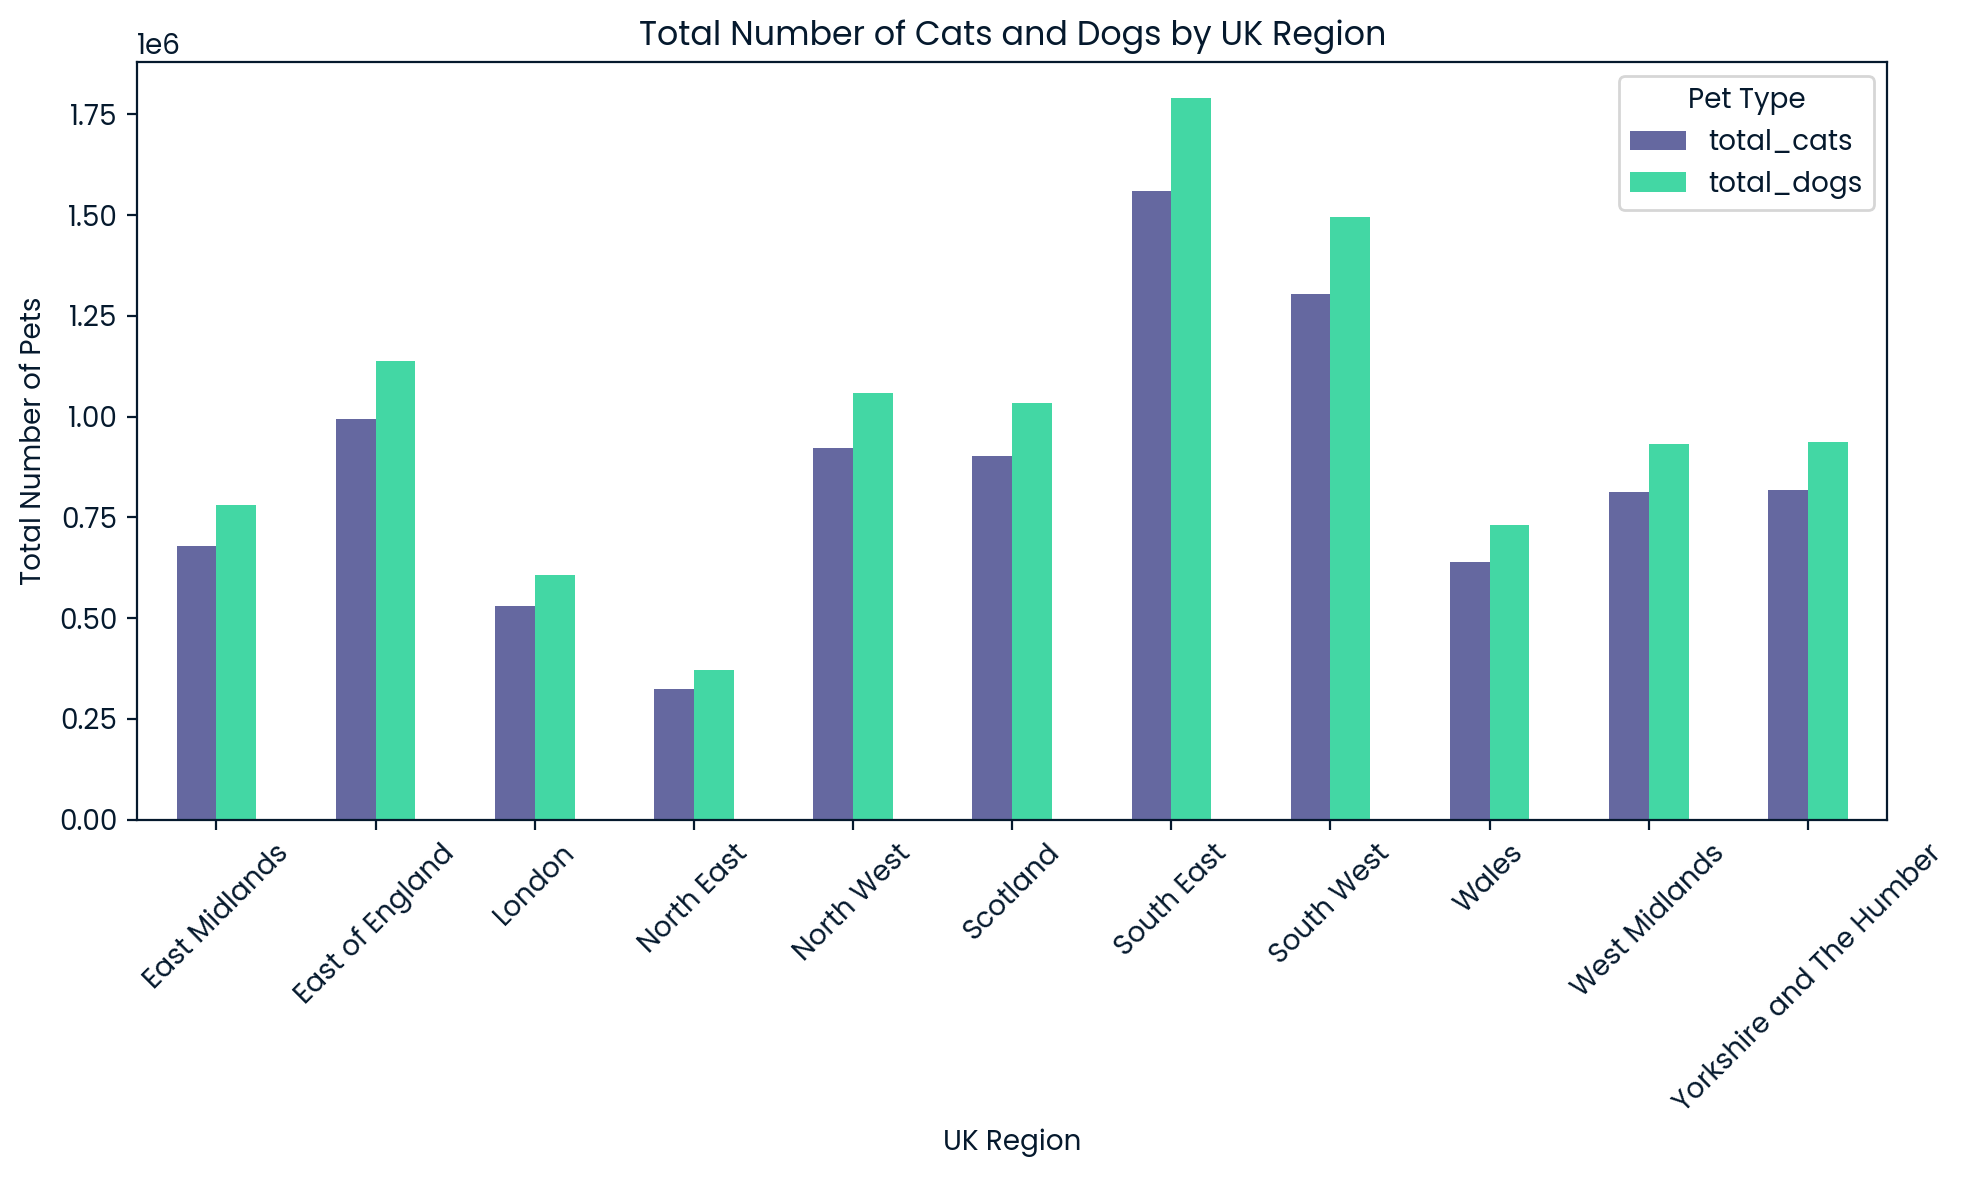

In [49]:
# Calculating total cats and dogs per region by multiplying pets per household by number of households
merged_data['total_cats'] = merged_data['cats_per_household'] * merged_data['num_households']
merged_data['total_dogs'] = merged_data['dogs_per_household'] * merged_data['num_households']

# Grouping by region and summing total cats and dogs
total_pets_by_region = merged_data.groupby('uk_region').sum()[['total_cats', 'total_dogs']]

# Plotting
total_pets_by_region.plot(kind='bar', figsize=(10, 6))
plt.title('Total Number of Cats and Dogs by UK Region')
plt.ylabel('Total Number of Pets')
plt.xlabel('UK Region')
plt.xticks(rotation=45)
plt.legend(title='Pet Type')
plt.tight_layout()
plt.show()

When looking at the actual number of cats and dogs, the North East region has the lowest number of total pets, London the second lowest, and the South East region having the most number of total pets. 

In [50]:
# Calculating cat to dog ratio for each region
cat_to_dog_ratio_region = JOINED.groupby('uk_region').sum()['estimated_cat_population'] / JOINED.groupby('uk_region').sum()['estimated_dog_population']

# Displaying the cat to dog ratio for each region
cat_to_dog_ratio_region

uk_region
East Midlands               0.871976
East of England             0.871976
London                      0.871976
North East                  0.871976
North West                  0.871976
Scotland                    0.871976
South East                  0.871976
South West                  0.871976
Wales                       0.871976
West Midlands               0.871976
Yorkshire and The Humber    0.871976
dtype: float64

In [51]:
# Calculating the ratio of cats per household times number of households to dogs per household times number of households, grouped by region
cats_dogs_ratio_by_region = (merged_data['cats_per_household'] * merged_data['num_households']) / (merged_data['dogs_per_household'] * merged_data['num_households'])
cats_dogs_ratio_by_region_grouped = cats_dogs_ratio_by_region.groupby(merged_data['uk_region']).mean()

# Displaying the calculated ratio
cats_dogs_ratio_by_region_grouped

uk_region
East Midlands               0.871976
East of England             0.871976
London                      0.871976
North East                  0.871976
North West                  0.871976
Scotland                    0.871976
South East                  0.871976
South West                  0.871976
Wales                       0.871976
West Midlands               0.871976
Yorkshire and The Humber    0.871976
dtype: float64

The cat to dog ratio seems fairly similar across the different regions in both the estimated data and the actual data. 

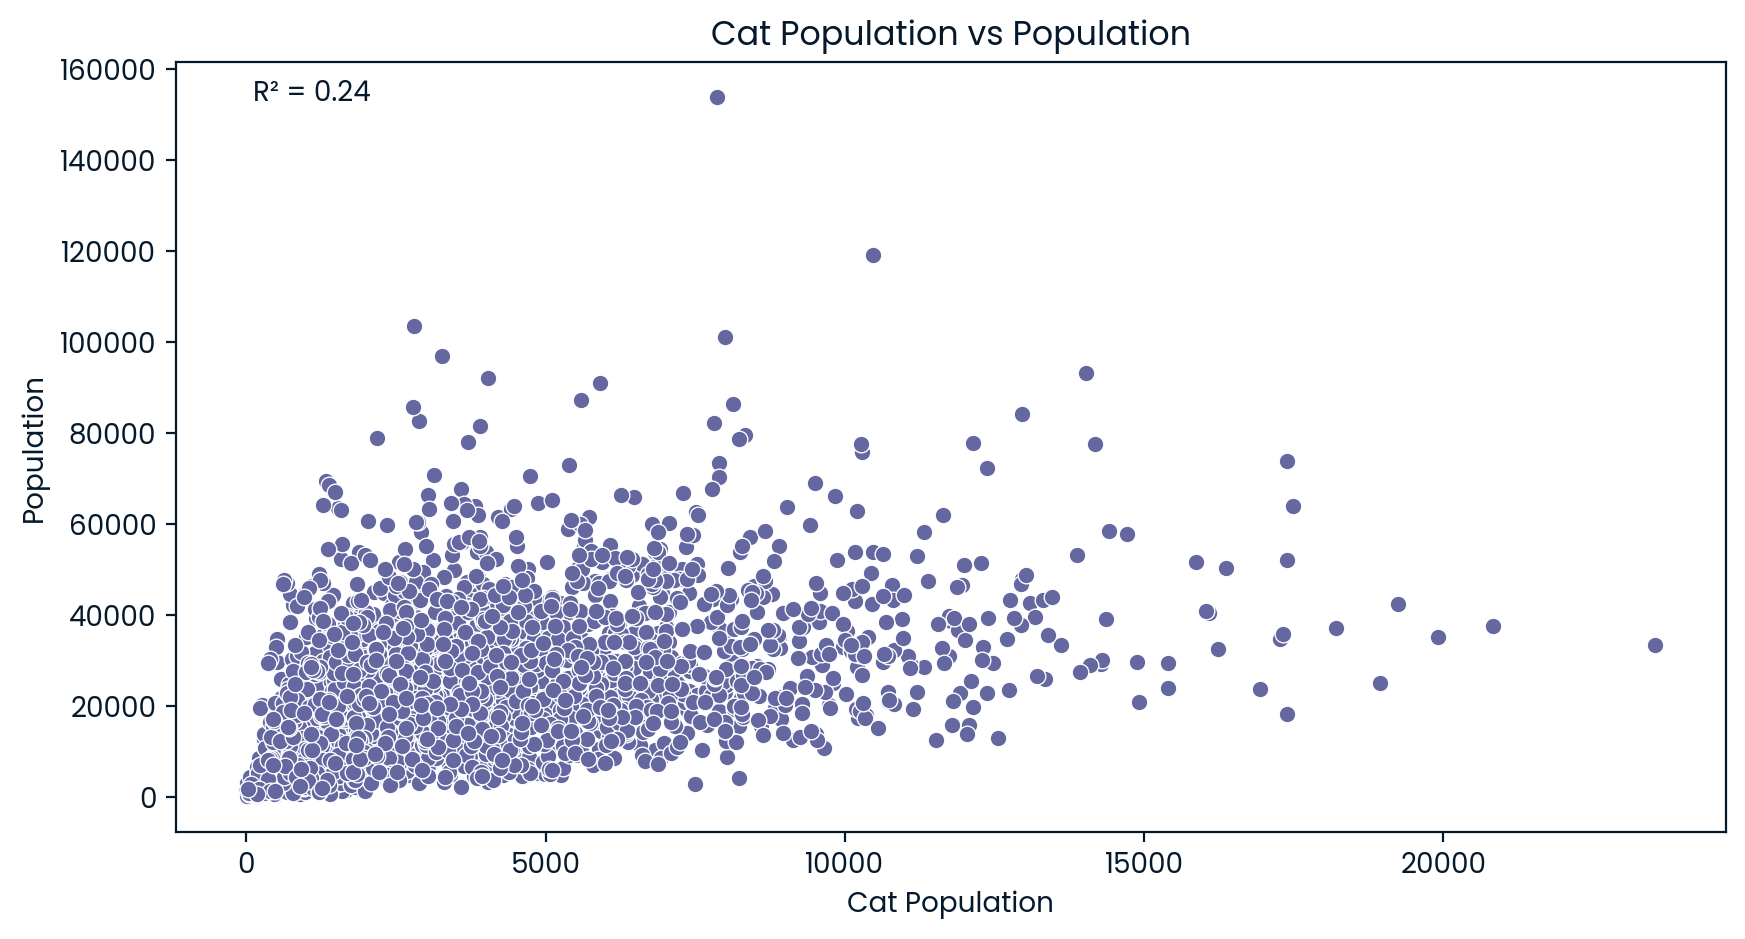

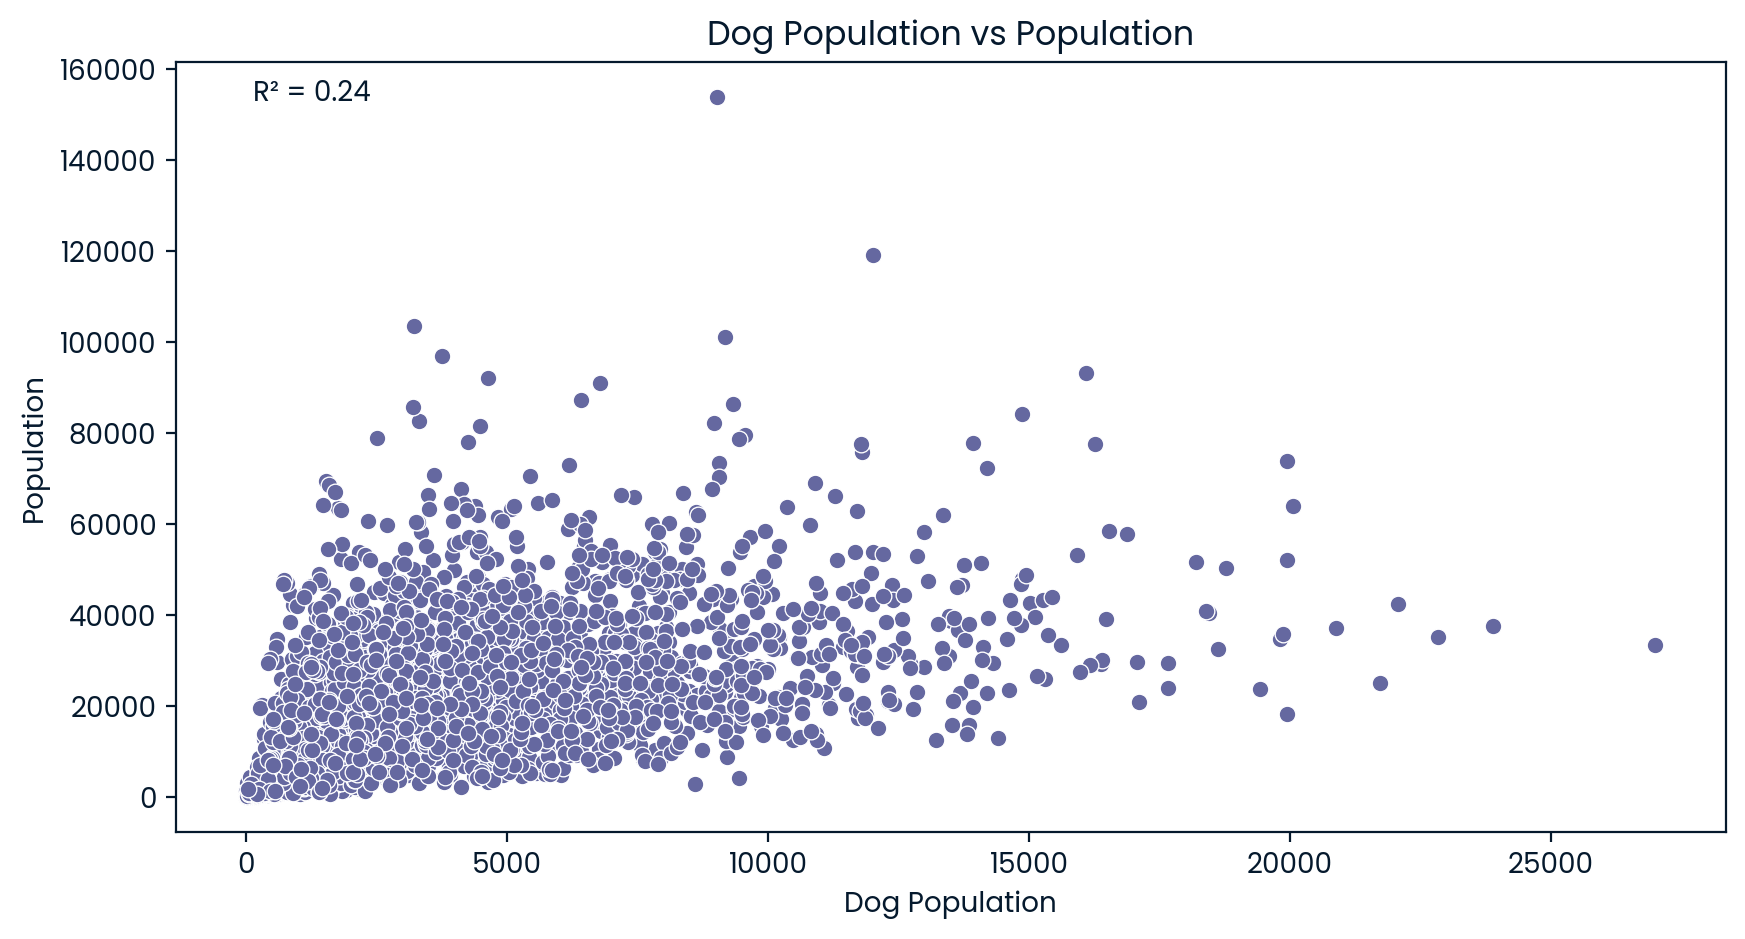

In [52]:
# Scatterplot for cat population vs population within the JOINED dataframe
plt.figure(figsize=(10, 5))
sns.scatterplot(data=JOINED, x='estimated_cat_population', y='population')
plt.title('Cat Population vs Population')
plt.xlabel('Cat Population')
plt.ylabel('Population')

# Calculate and display R-squared for cat population vs population
cat_slope, cat_intercept, cat_r_value, _, _ = linregress(JOINED['estimated_cat_population'], JOINED['population'])
plt.text(0.05, 0.95, f'R² = {cat_r_value**2:.2f}', transform=plt.gca().transAxes)

plt.show()

# Scatterplot for dog population vs population within the JOINED dataframe
plt.figure(figsize=(10, 5))
sns.scatterplot(data=JOINED, x='estimated_dog_population', y='population')
plt.title('Dog Population vs Population')
plt.xlabel('Dog Population')
plt.ylabel('Population')

# Calculate and display R-squared for dog population vs population
dog_slope, dog_intercept, dog_r_value, _, _ = linregress(JOINED['estimated_dog_population'], JOINED['population'])
plt.text(0.05, 0.95, f'R² = {dog_r_value**2:.2f}', transform=plt.gca().transAxes)

plt.show()

The pet populations have a weak positive correlation with the human population. The r-squared is only 0.24 which means while one population increases, the other will only increase slightly and vice versa. 

## 🐈 Conclusion

In conclusion, our analysis suggests that pet ownership preferences, whether for cats or dogs, does not seem to correlate with geographic regions. It seems that all regions in the UK prefers dogs over cats. The debate is settled!